In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
column_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=column_names)

In [36]:
df.sample(10)

,user_id,item_id,rating,timestamp
94747,56,405,4,892679460
76750,710,432,5,882064434
48437,738,96,5,892844112
91271,880,310,3,892958036
33213,13,851,5,882139966
81717,456,1604,4,881372849
11048,381,378,4,892696019
37327,466,89,3,890284819
15994,285,682,4,890595524
22922,493,222,3,884130416


In [37]:
movie_titles =pd.read_csv('Movie_Id_Titles')

In [38]:
movie_titles.sample(10)

,item_id,title
1366,1367,Faust (1994)
286,287,Marvin's Room (1996)
1656,1657,Target (1995)
1420,1421,My Crazy Life (Mi vida loca) (1993)
1298,1299,Penny Serenade (1941)
1506,1507,Three Lives and Only One Death (1996)
421,422,Aladdin and the King of Thieves (1996)
385,386,Addams Family Values (1993)
567,568,Speed (1994)
1293,1294,Ayn Rand: A Sense of Life (1997)


In [39]:
df=pd.merge(df,movie_titles,on='item_id')

In [40]:
df.sample(10)

,user_id,item_id,rating,timestamp,title
54075,894,57,4,882404397,Priest (1994)
36339,216,3,4,880233061,Four Rooms (1995)
46995,655,97,3,887426931,Dances with Wolves (1990)
19261,138,514,5,879024043,Annie Hall (1977)
26644,818,258,4,891870301,Contact (1997)
59759,90,632,5,891384113,Sophie's Choice (1982)
40147,845,751,2,885409719,Tomorrow Never Dies (1997)
15126,268,1016,3,875742470,Con Air (1997)
72973,481,283,5,885828389,Emma (1996)
29419,250,235,2,878089786,Mars Attacks! (1996)


# EDA

In [76]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [81]:
rating=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

title
'Til There Was You (1997)    2.33333
1-900 (1994)                     2.6
101 Dalmatians (1996)        2.90826
12 Angry Men (1957)            4.344
187 (1997)                   3.02439
Name: rating, dtype: object

In [78]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [83]:
rating['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [84]:
rating.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


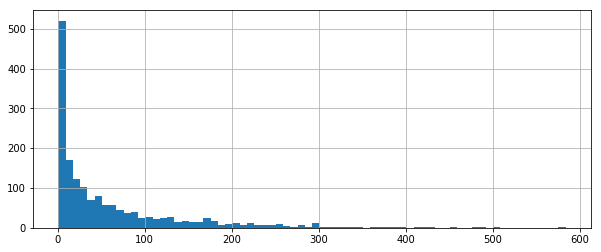

In [85]:
plt.figure(figsize=(10,4))
rating['num of ratings'].hist(bins=70)

In [82]:
mv=df.pivot_table(index='user_id',columns='title',values='rating')
mv.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
rating.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [91]:
rating.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [ ]:
starwars_user_ratings = df[]